In [1]:
import sys, os
import numpy as np

sys.path.append(os.path.join(os.path.pardir, 'python'))
from tcg_slb.phasediagram import ScipyPDReactiveODE, PDReactiveGrid, PDReactiveGridDiagnostics
from tcg_slb.base import *


In [2]:
pv = repr(sys.version_info.major)+'.'+repr(sys.version_info.minor)
sys.path.append(os.path.join(os.path.pardir, 'database', 'install', 'MgSiAlAlO3_all_2site_slb_rx', 'lib', 'python'+pv, 'site-packages'))

import py_MgSiAlAlO3_all_2site_slb_rx as tcgdb
rxn = tcgdb.MgSiAlAlO3_all_2site_slb_rx()
rxn.report()

Reaction object: MgSiAlAlO3_all_2site_slb_rx

Phase 0 MgAlPerovskite_slb_ph (mgalpv)
     Endmember 0 MgPerovskite_slb_em : MgSiO3_(mgalpv)
     Endmember 1 AlPerovskite_slb_em : Al2O3_(mgalpv)
Phase 1 MgAlAkimotoite_slb_ph (mgalak)
     Endmember 0 MgAkimotoite_slb_em : MgSiO3_(mgalak)
     Endmember 1 AlAkimotoite_slb_em : Al2O3_(mgalak)
Phase 2 MgWadsleyite_slb_ph (mgwa)
     Endmember 0 MgWadsleyite_slb_em : Mg2SiO4_(mgwa)
Phase 3 Stishovite_slb_ph (st)
     Endmember 0 Stishovite_slb_em : SiO2_(st)
Phase 4 MgAlGarnet_slb_ph (mgalgt)
     Endmember 0 MgMajorite_slb_em : Mg4Si4O12_(mgalgt)
     Endmember 1 Pyrope_slb_em : Mg3Al2Si3O12_(mgalgt)
Phase 5 HPClinoenstatite_slb_ph (hpcen)
     Endmember 0 HPClinoenstatite_slb_em : Mg2Si2O6_(hpcen)
Phase 6 MgAlOrthopyroxene2Site_slb_ph (mgalopx)
     Endmember 0 Enstatite_slb_em : Mg2Si2O6_(mgalopx)
     Endmember 1 MgTschermaks_slb_em : MgAl2SiO6_(mgalopx)
Phase 7 MgSpinel_slb_ph (mgsp)
     Endmember 0 MgSpinel_slb_em : Mg4Al8O16_(mgsp)


### Setup ODE

In [3]:
ode = ScipyPDReactiveODE(rxn)

#### Temperature, pressure, composition

In [4]:
# initial temperature, pressure and phase volume fraction
Ti = 1873.                # Kelvin
pi = GPa2Bar(2.)         # bars
Ci0 = [0.6, 0.4]
i0 =  0                   # initial phase index

#### Initial conditions

In [5]:
mi0 = np.zeros(ode.I)
mi0[i0] = 1.
Cik0 = np.zeros(ode.K)
for i in range(ode.I):
    if ode.Kis[i] == 1:
        Cik0[sum(ode.Kis[:i]):sum(ode.Kis[:i+1])] = 1.
    else:
        Cik0[sum(ode.Kis[:i]):sum(ode.Kis[:i+1])][:] = np.asarray(Ci0)
        
display(mi0, Cik0)

array([1., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0.6, 0.4, 0.6, 0.4, 1. , 1. , 0.6, 0.4, 1. , 0.6, 0.4, 1. , 1. ])

### Solve the system of reactive ODEs at a fixed pressure and temperature

In [6]:
rxn.phases()[i0].c_to_x(Ci0)

[0.6037245714710681, 0.396275428528932]

In [7]:
ode.solve(Ti,pi,mi0,Cik0,100.0)

In [8]:
ode.final_phases(1.e-2)

(array(['MgAlAkimotoite_slb_ph', 'MgAlOrthopyroxene2Site_slb_ph',
        'MgSpinel_slb_ph'], dtype='<U29'),
 array(['mgalak', 'mgalopx', 'mgsp'], dtype='<U7'))

## Plotting

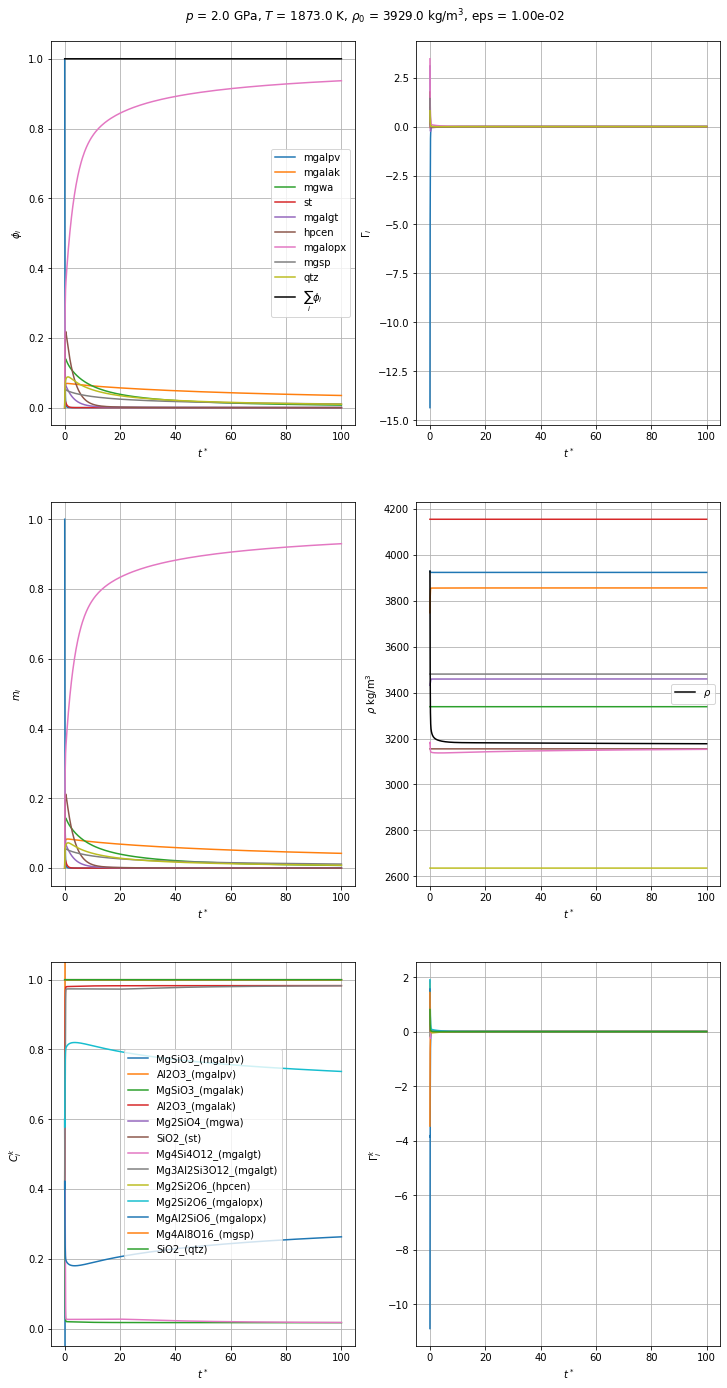

In [9]:
ode.plot()

In [10]:
ode = ScipyPDReactiveODE(rxn)

#### Temperature, pressure, composition

In [11]:
# initial temperature, pressure and phase volume fraction
Ti = 1873.                # Kelvin
pi = GPa2Bar(2.)         # bars
Ci0 = [0.6, 0.4]
i0 =  0                   # initial phase index

#### Initial conditions

In [12]:
mi0 = np.zeros(ode.I)
mi0[i0] = 1.
Cik0 = np.zeros(ode.K)
for i in range(ode.I):
    if ode.Kis[i] == 1:
        Cik0[sum(ode.Kis[:i]):sum(ode.Kis[:i+1])] = 1.
    else:
        Cik0[sum(ode.Kis[:i]):sum(ode.Kis[:i+1])][:] = np.asarray(Ci0)
        
display(mi0, Cik0)

array([1., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0.6, 0.4, 0.6, 0.4, 1. , 1. , 0.6, 0.4, 1. , 0.6, 0.4, 1. , 1. ])

### Solve the system of reactive ODEs at a fixed pressure and temperature

In [13]:
rxn.phases()[i0].c_to_x(Ci0)

[0.6037245714710681, 0.396275428528932]

In [14]:
ode.solve(Ti,pi,mi0,Cik0,100.0)

In [15]:
ode.final_phases(1.e-2)

(array(['MgAlAkimotoite_slb_ph', 'MgAlOrthopyroxene2Site_slb_ph',
        'MgSpinel_slb_ph'], dtype='<U29'),
 array(['mgalak', 'mgalopx', 'mgsp'], dtype='<U7'))

## Plotting

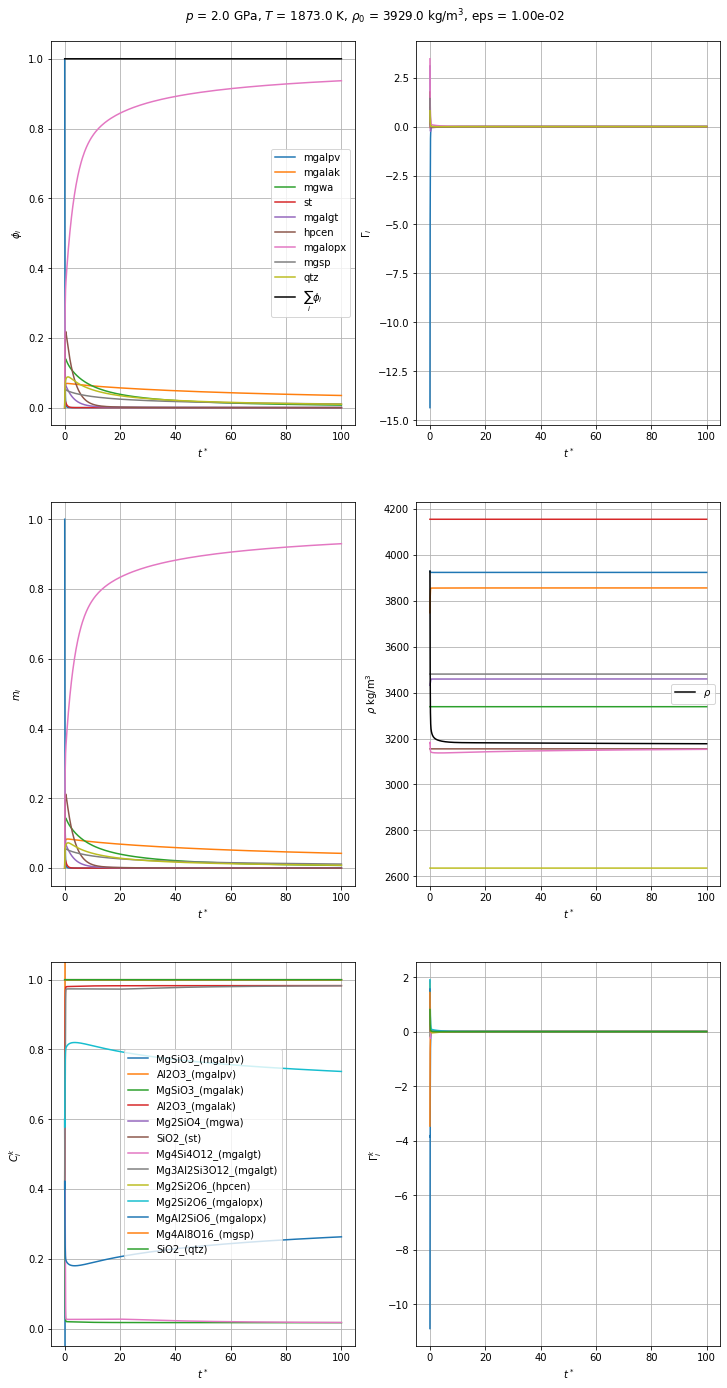

In [16]:
ode.plot()

## Solve for a grid

In [17]:
reload = False

import pickle

filename = os.path.join('output', 'scipy_bdfgrid_mgsialalsio3_lowp_fixedrxns_2site.pickle')

if reload:
    pfile = open(filename, 'rb')
    bdfgrid = pickle.load(pfile)
    pfile.close()
else:
    i0 = 0
    p_n = 20
    p_min = 0.0 + 0.5*30/p_n
    #p_max = 30.0 - 0.5*30/p_n
    p_max = 11.25
    p_n = 8
    p_range = np.linspace(p_min, p_max, p_n)
    x_n = 10
    x_min = 0.5/x_n
    x_max = 1. - 0.5/x_n
    x_range = np.linspace(x_min, x_max, x_n)
    end = 1e5
    bdfgrid = PDReactiveGrid()
    bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['Xi0k0', 'p'], x_range, p_range, end, **{'T':Ti})

In [18]:
save = True

if save:
        pfile = open(filename, 'wb')
        pickle.dump(bdfgrid, pfile)
        pfile.close()

In [19]:
import matplotlib.pyplot as plt

def decorate(pdrgd):
    def new_setup_axes(self,axi):
        img = plt.imread("figures/slb_figure10b.png")
        ip = axi.imshow(img)
        axi.axis('off')
        ax = axi.inset_axes([0.02,0.001,0.98,0.998])
        ax.patch.set_alpha(0.0)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 30.0])
        ax.set_ylabel("Pressure (GPa)")
        ax.set_xlabel("Initial $X_{MgSiO_3}$")
        ax.invert_xaxis()
        return ax
    
    #replace the display with newdisplay
    pdrgd.setup_axes = new_setup_axes
    
    #return the modified student 
    return pdrgd

bdfdiag = decorate(PDReactiveGridDiagnostics)(rxn,bdfgrid)

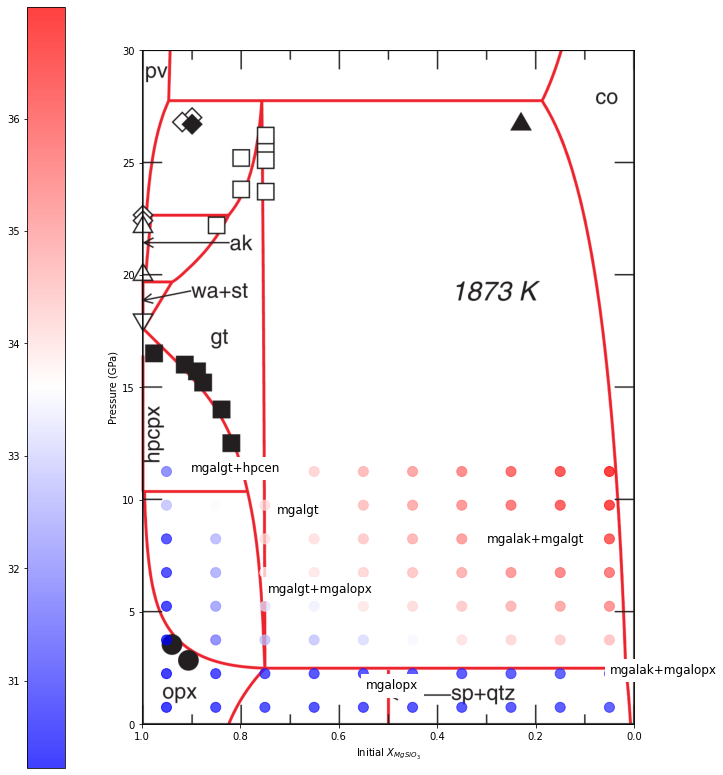

In [20]:
bdfdiag.plot_rho()

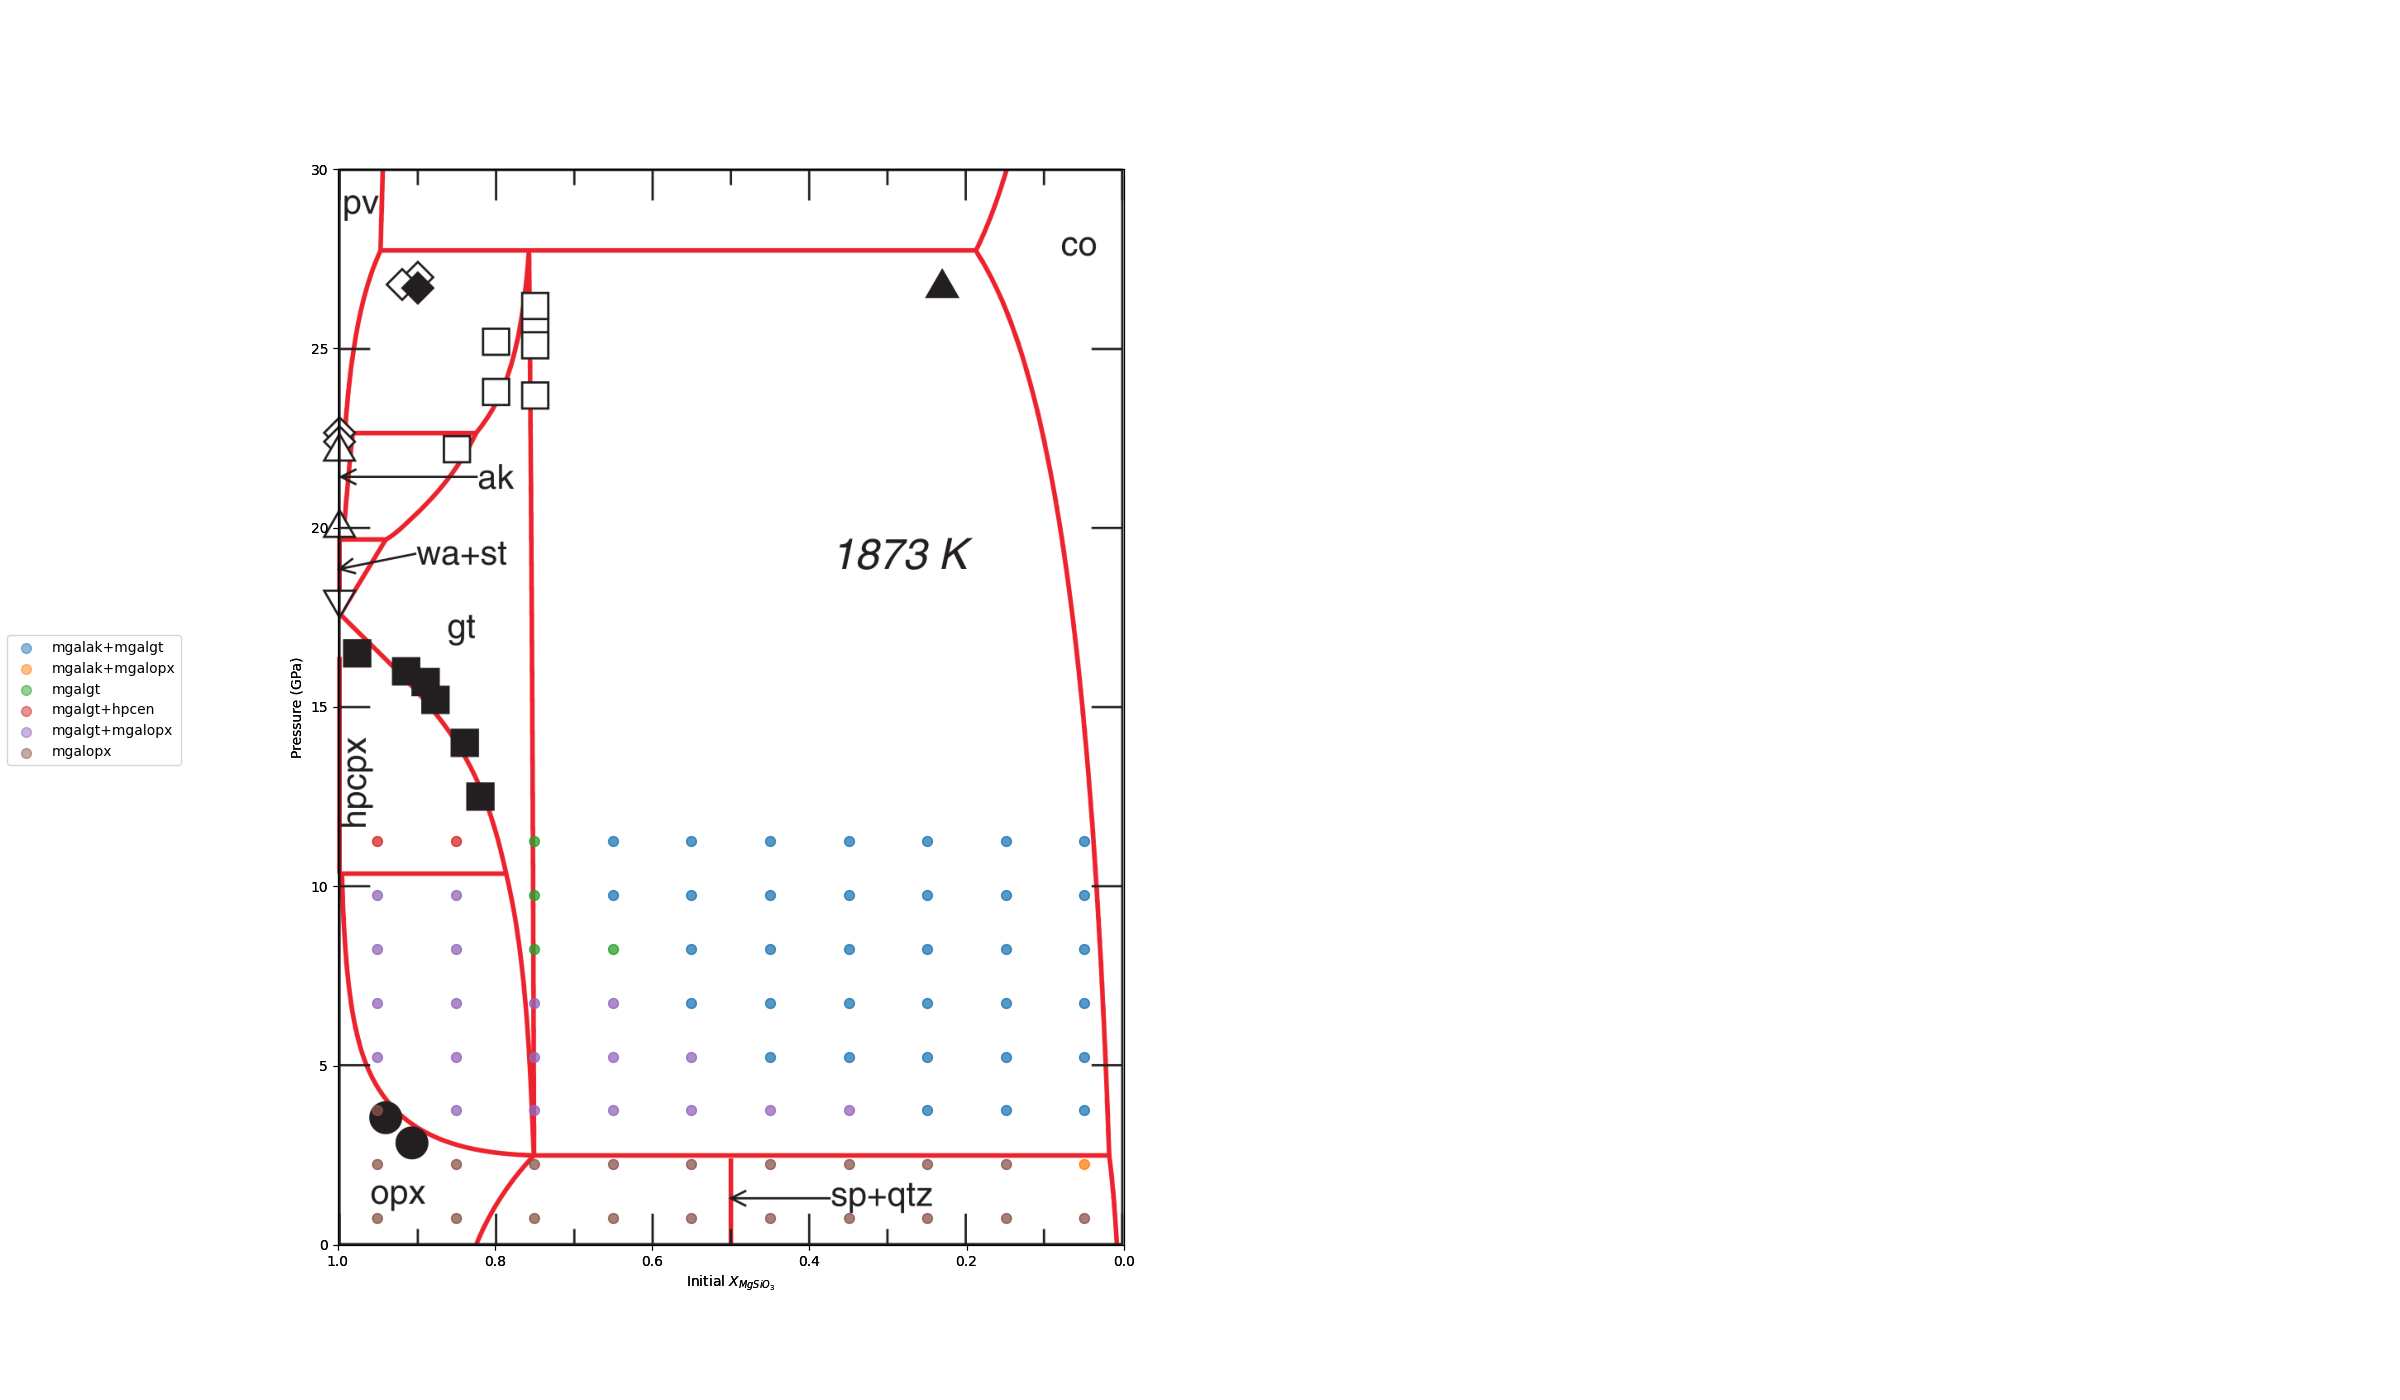

In [21]:
%matplotlib widget
bdfdiag.plot_phases()

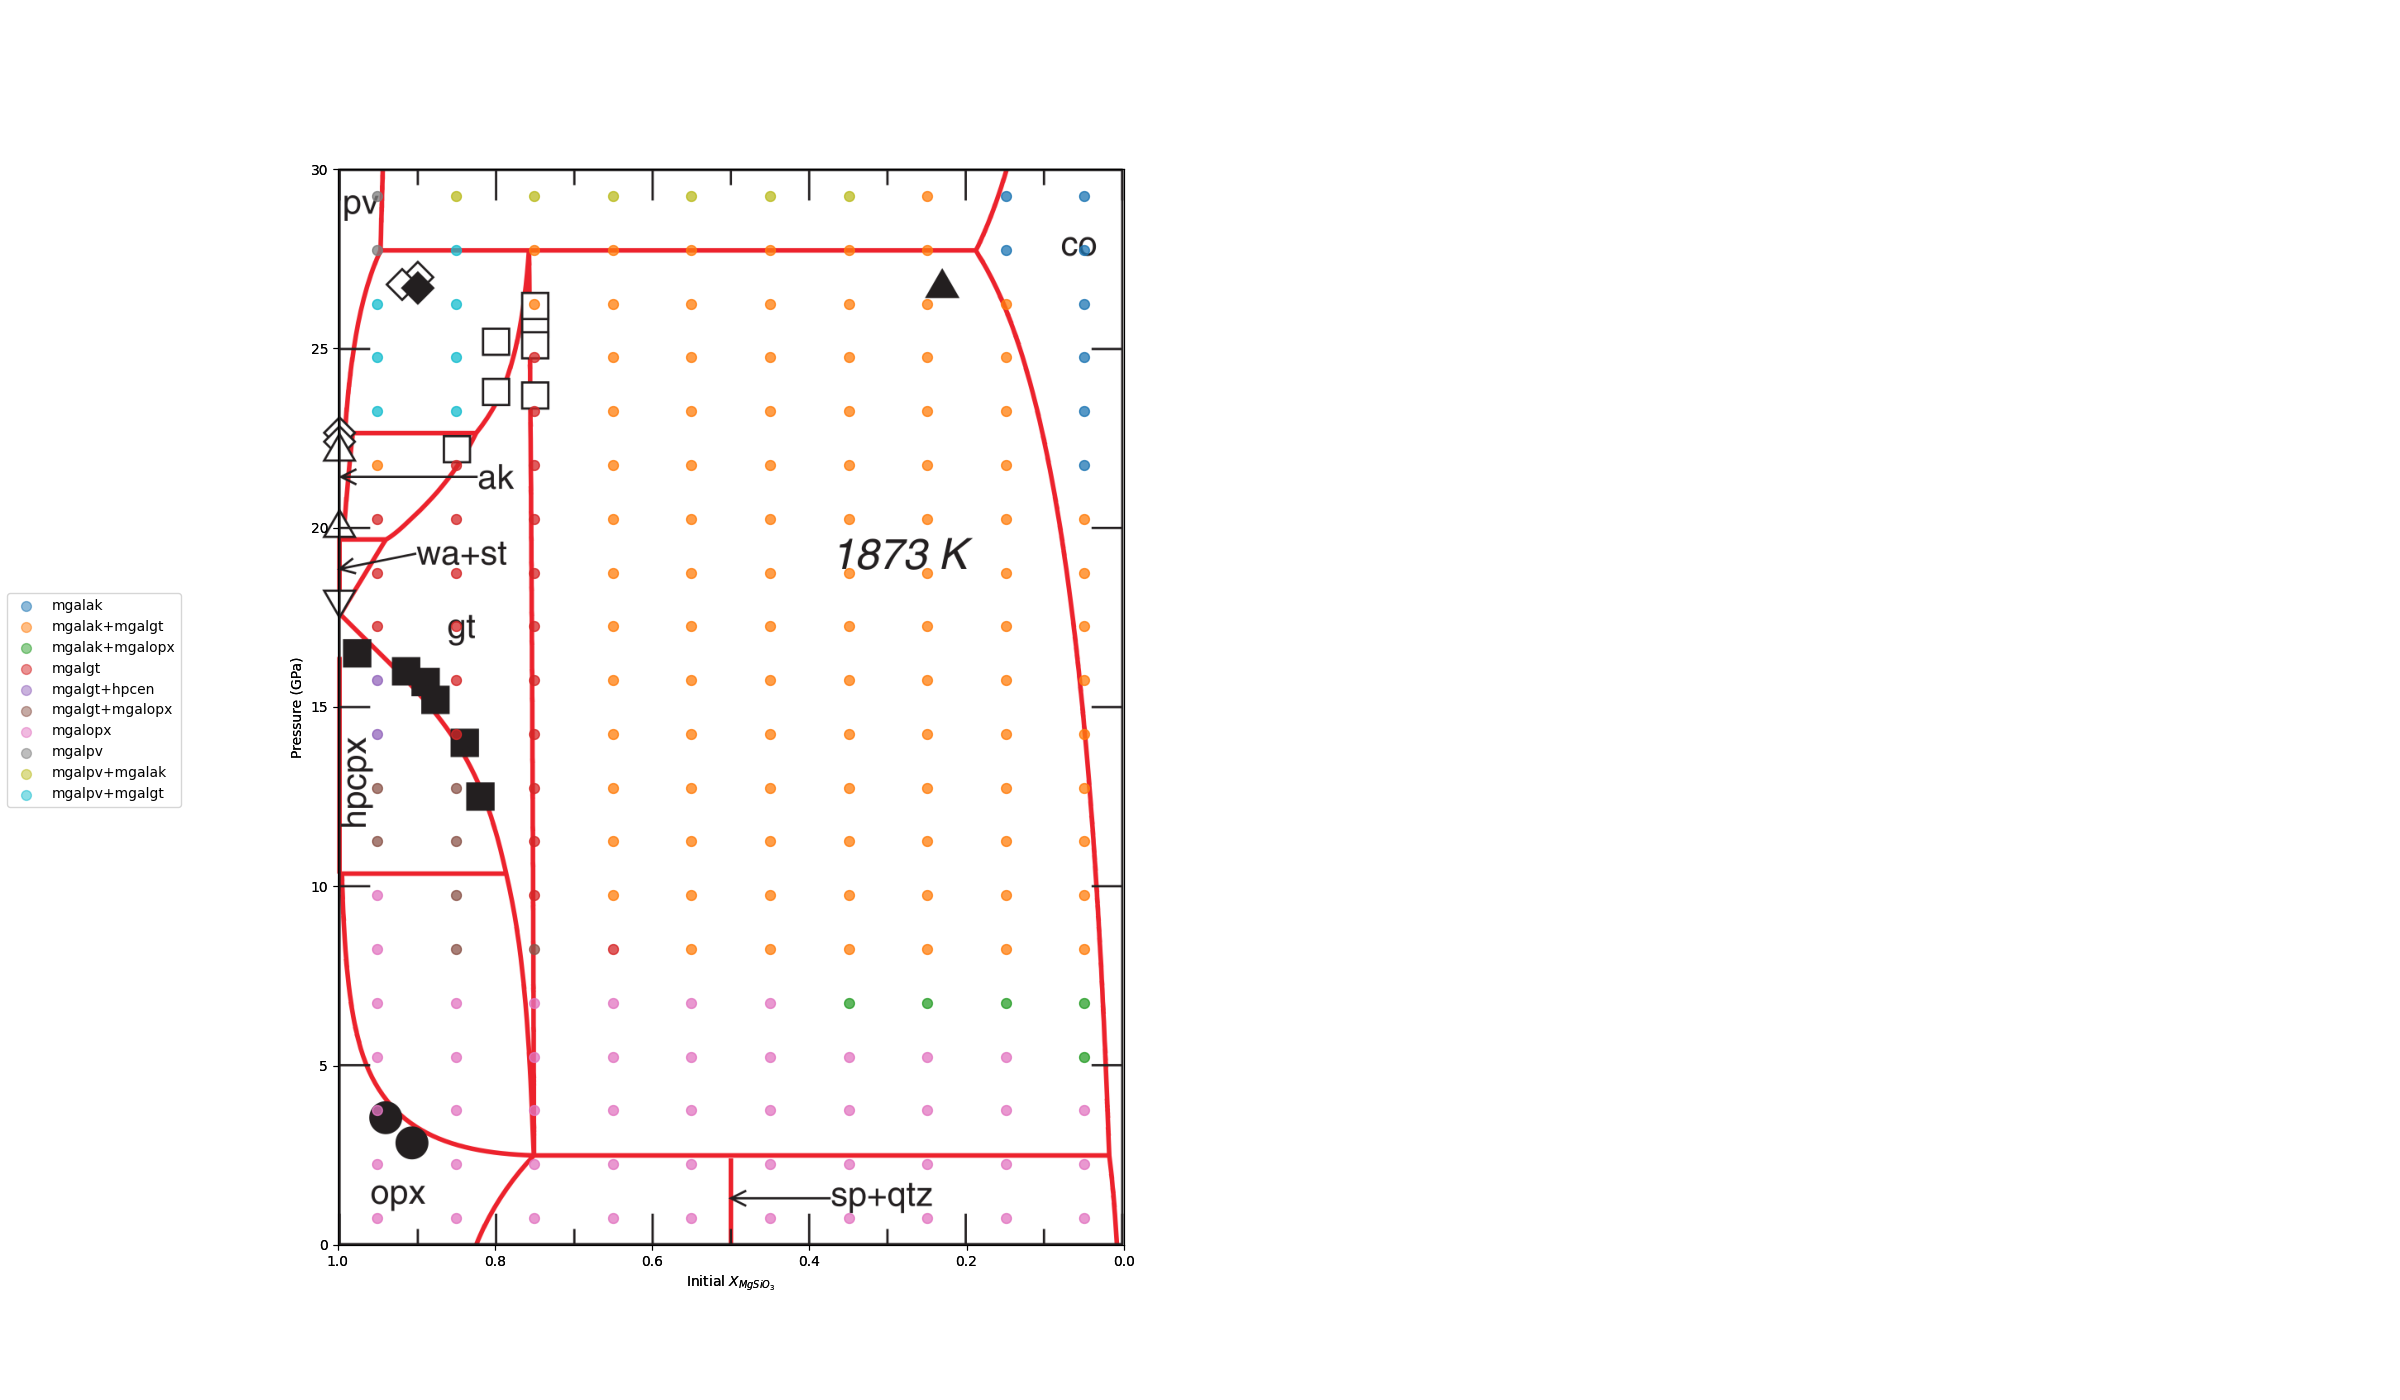

In [21]:
%matplotlib widget
bdfdiag.plot_phases()

In [24]:
bdfdiag.grid.pgrid[7][9]

11.25

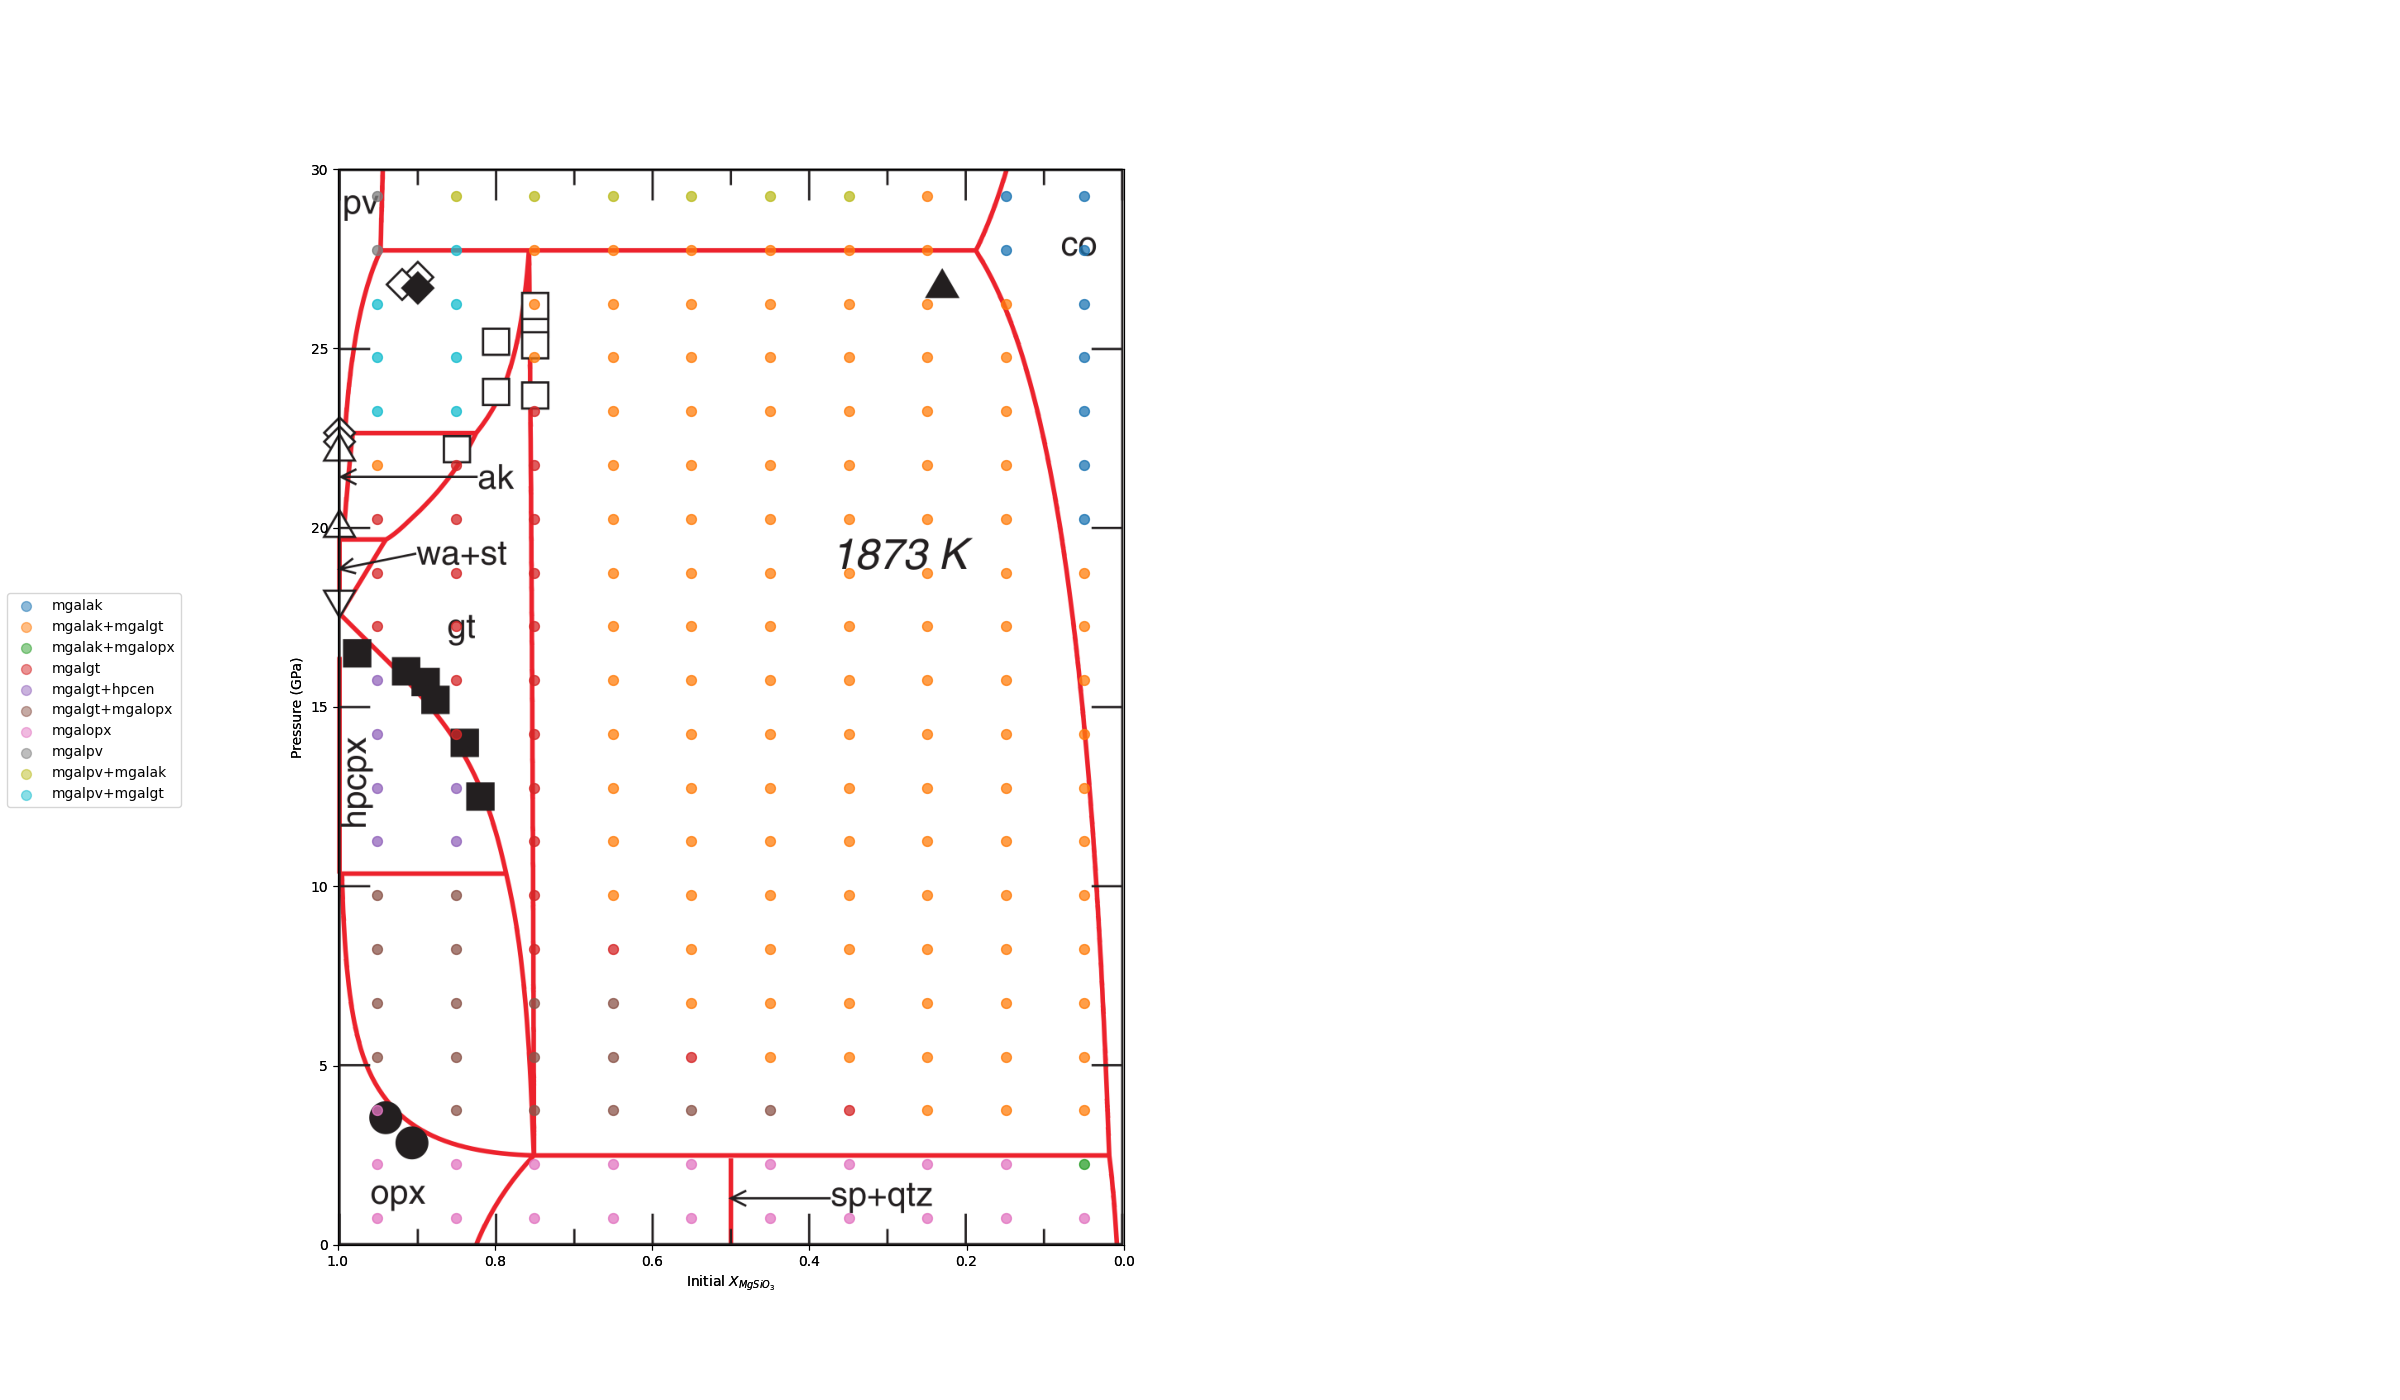

In [14]:
%matplotlib widget
bdfdiag.plot_phases()

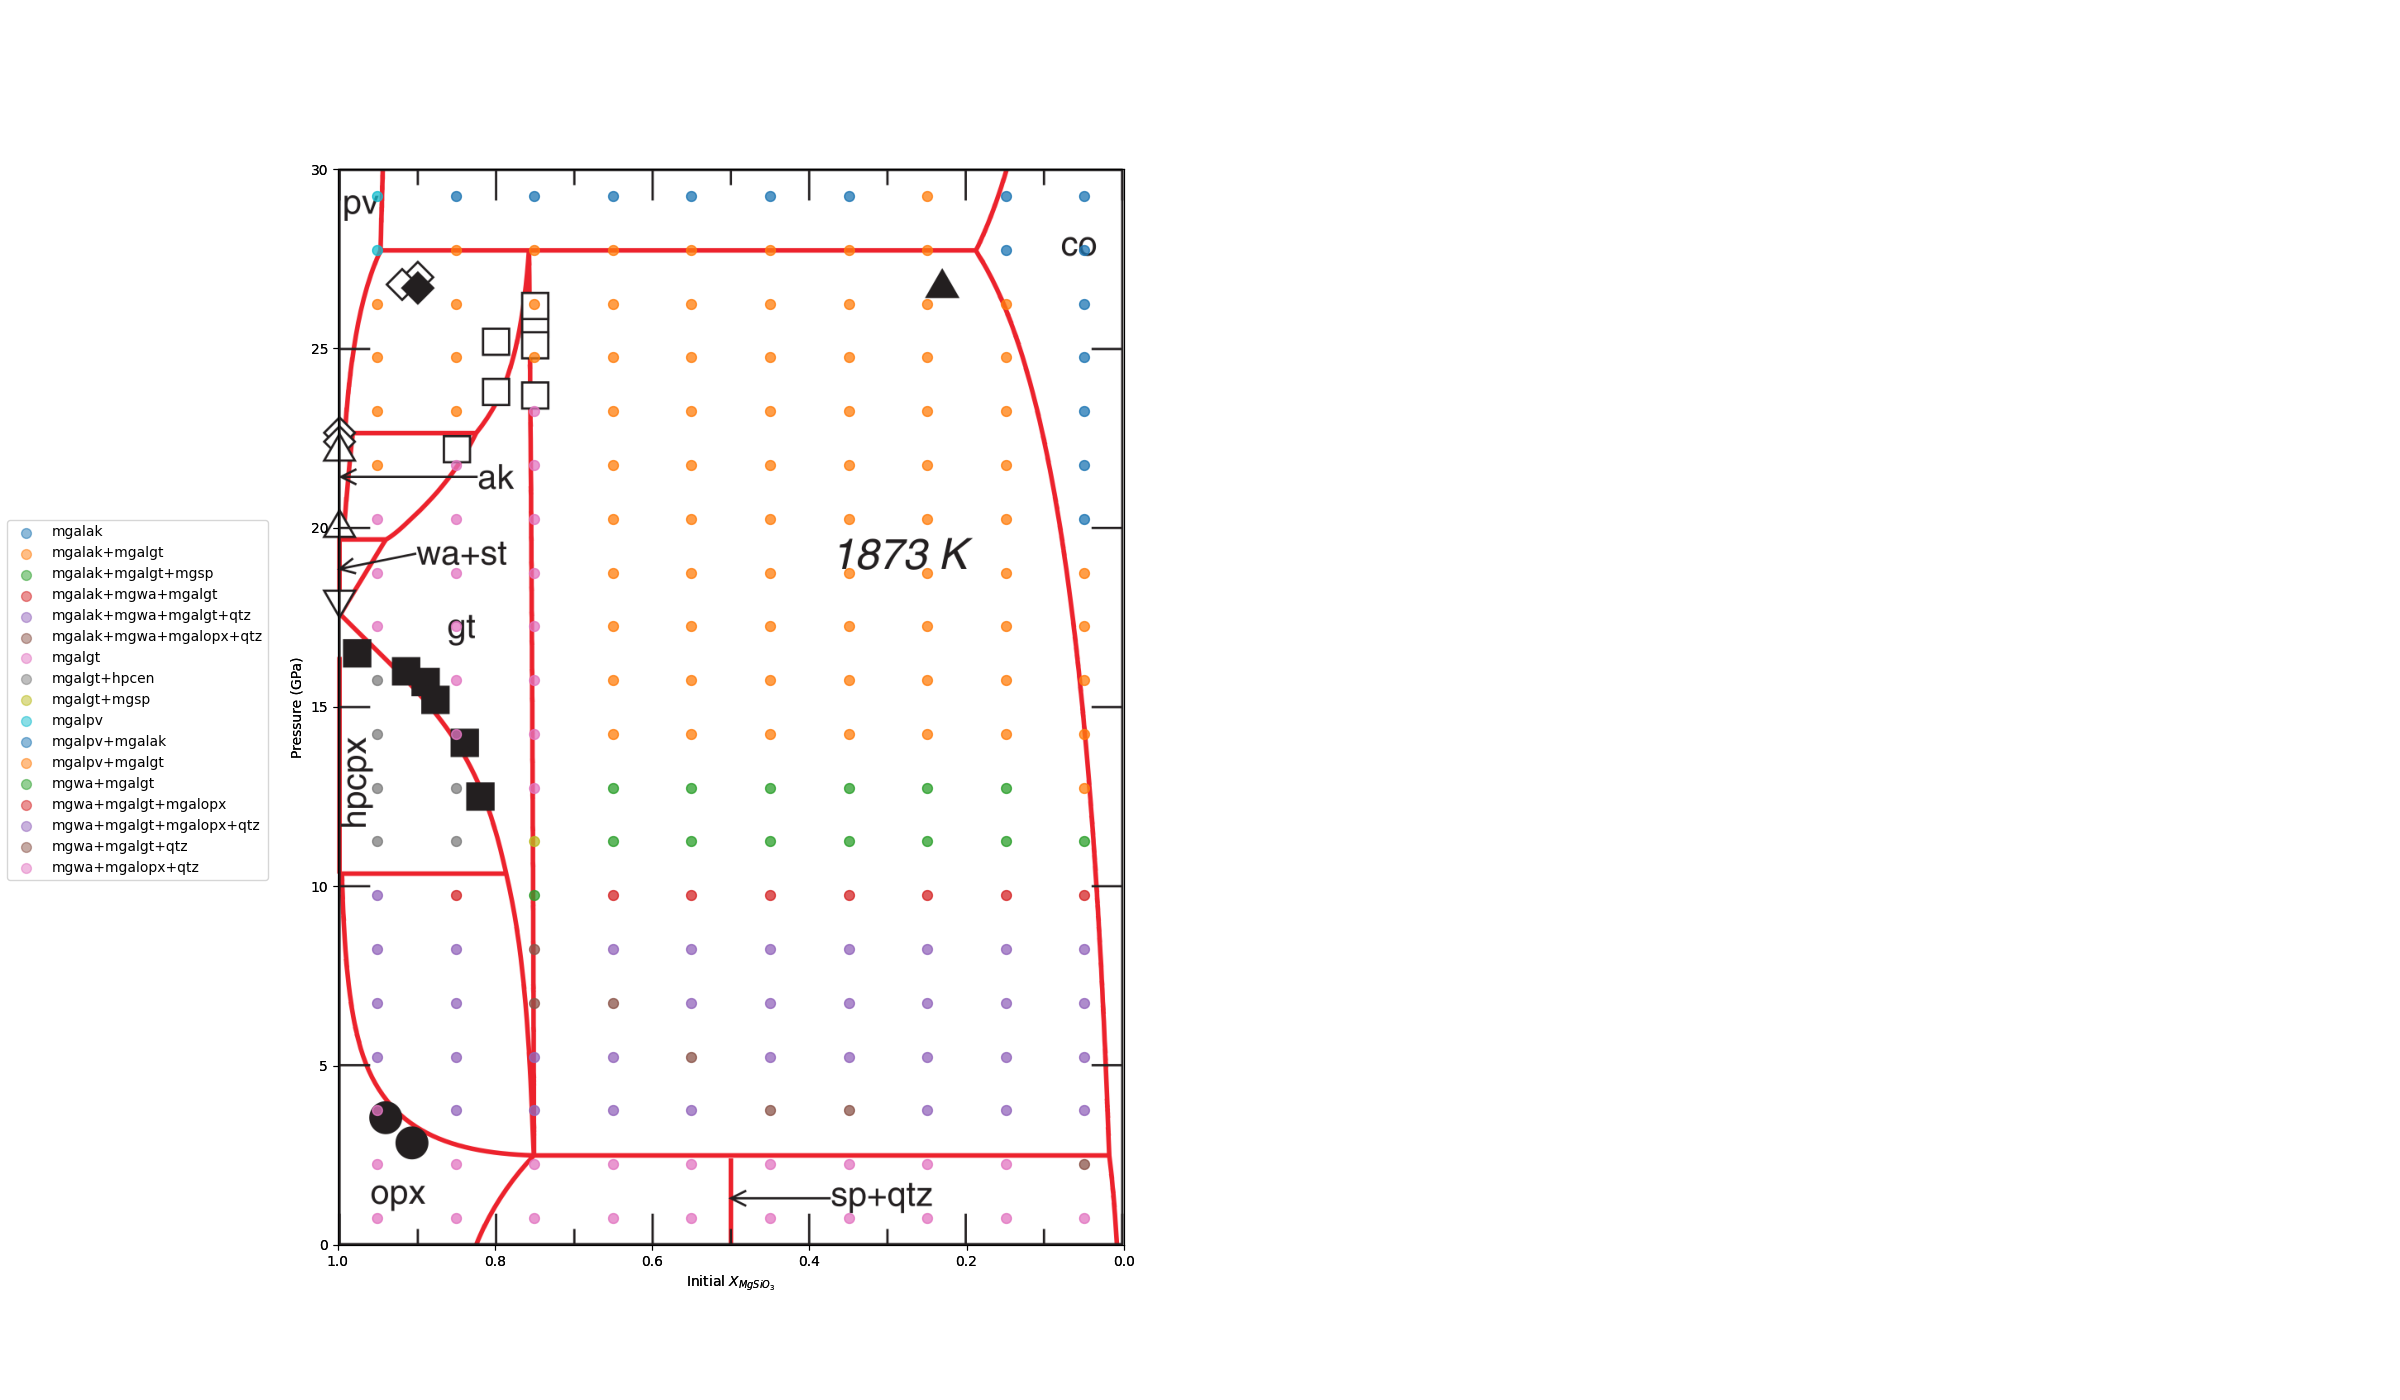

In [15]:
%matplotlib widget
bdfdiag.plot_phases()

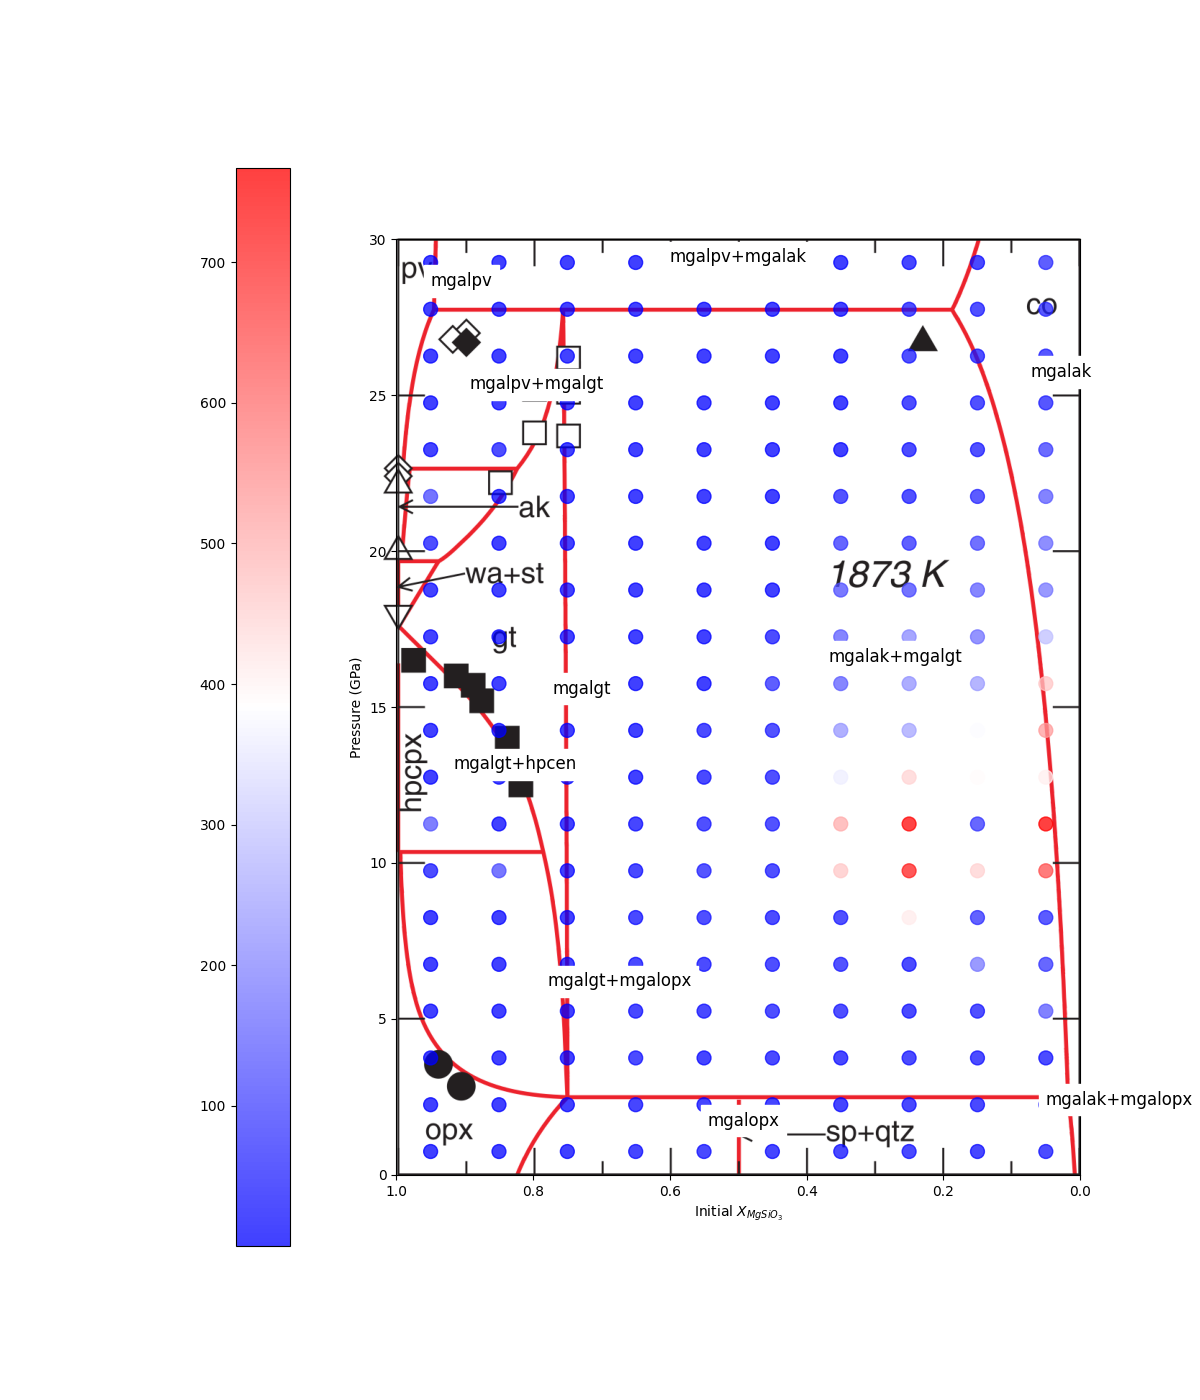

In [15]:
bdfdiag.plot_stime()

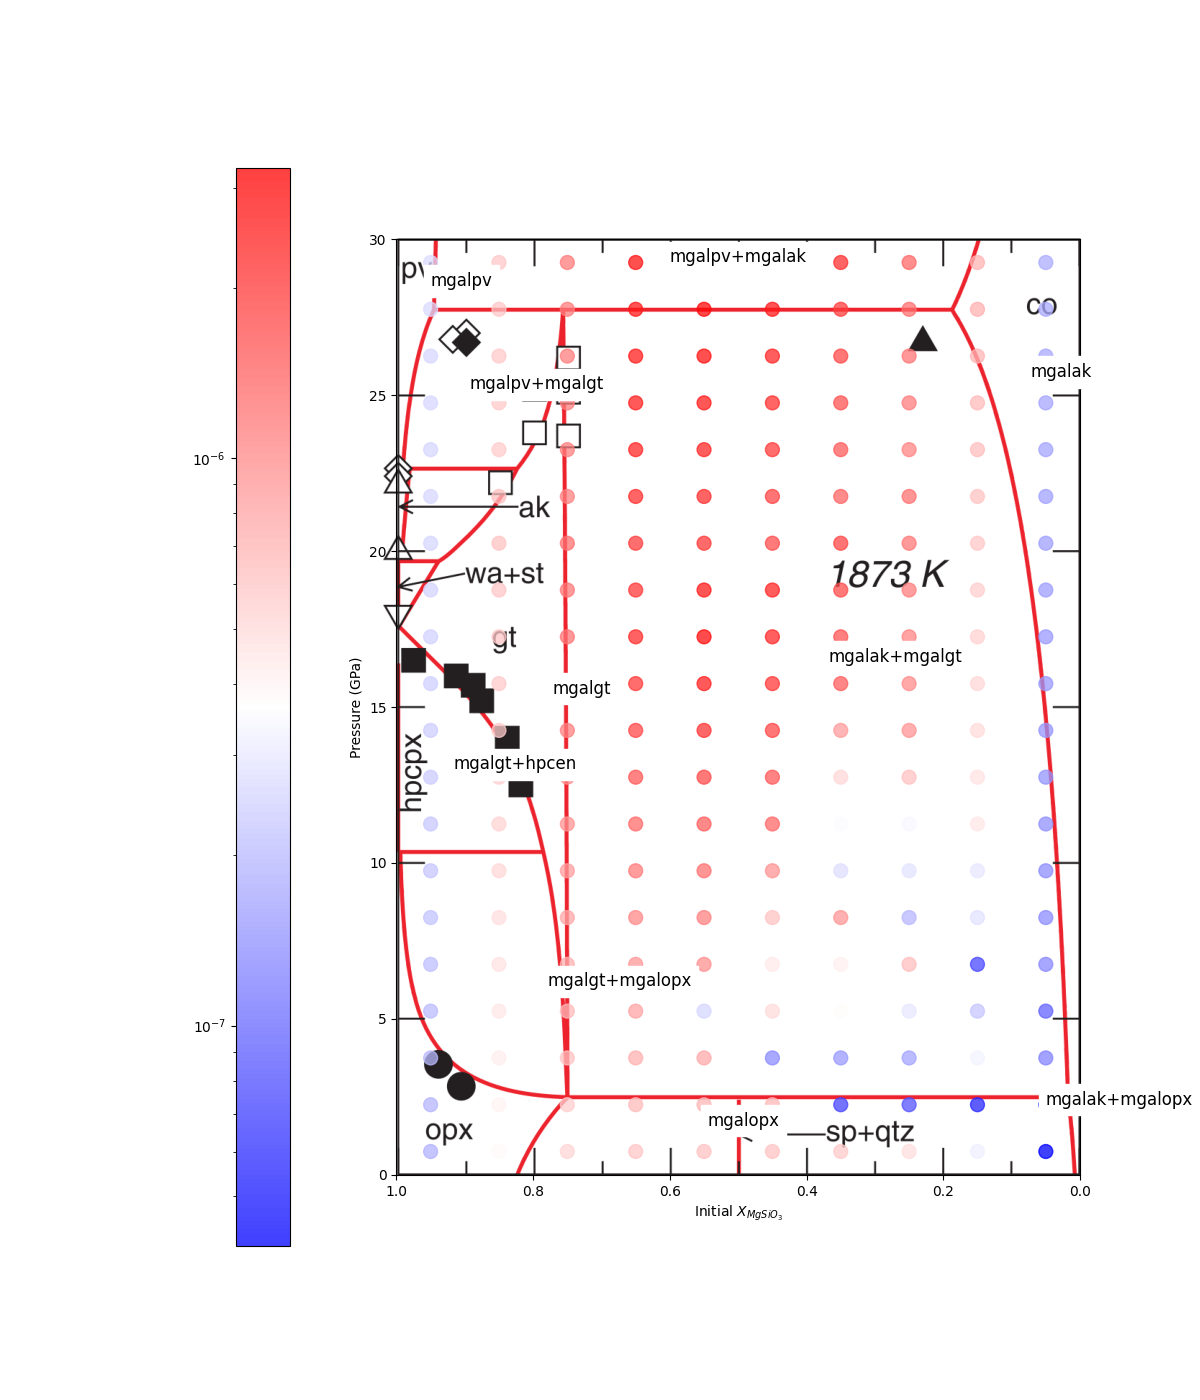

In [16]:
bdfdiag.plot_mindt()

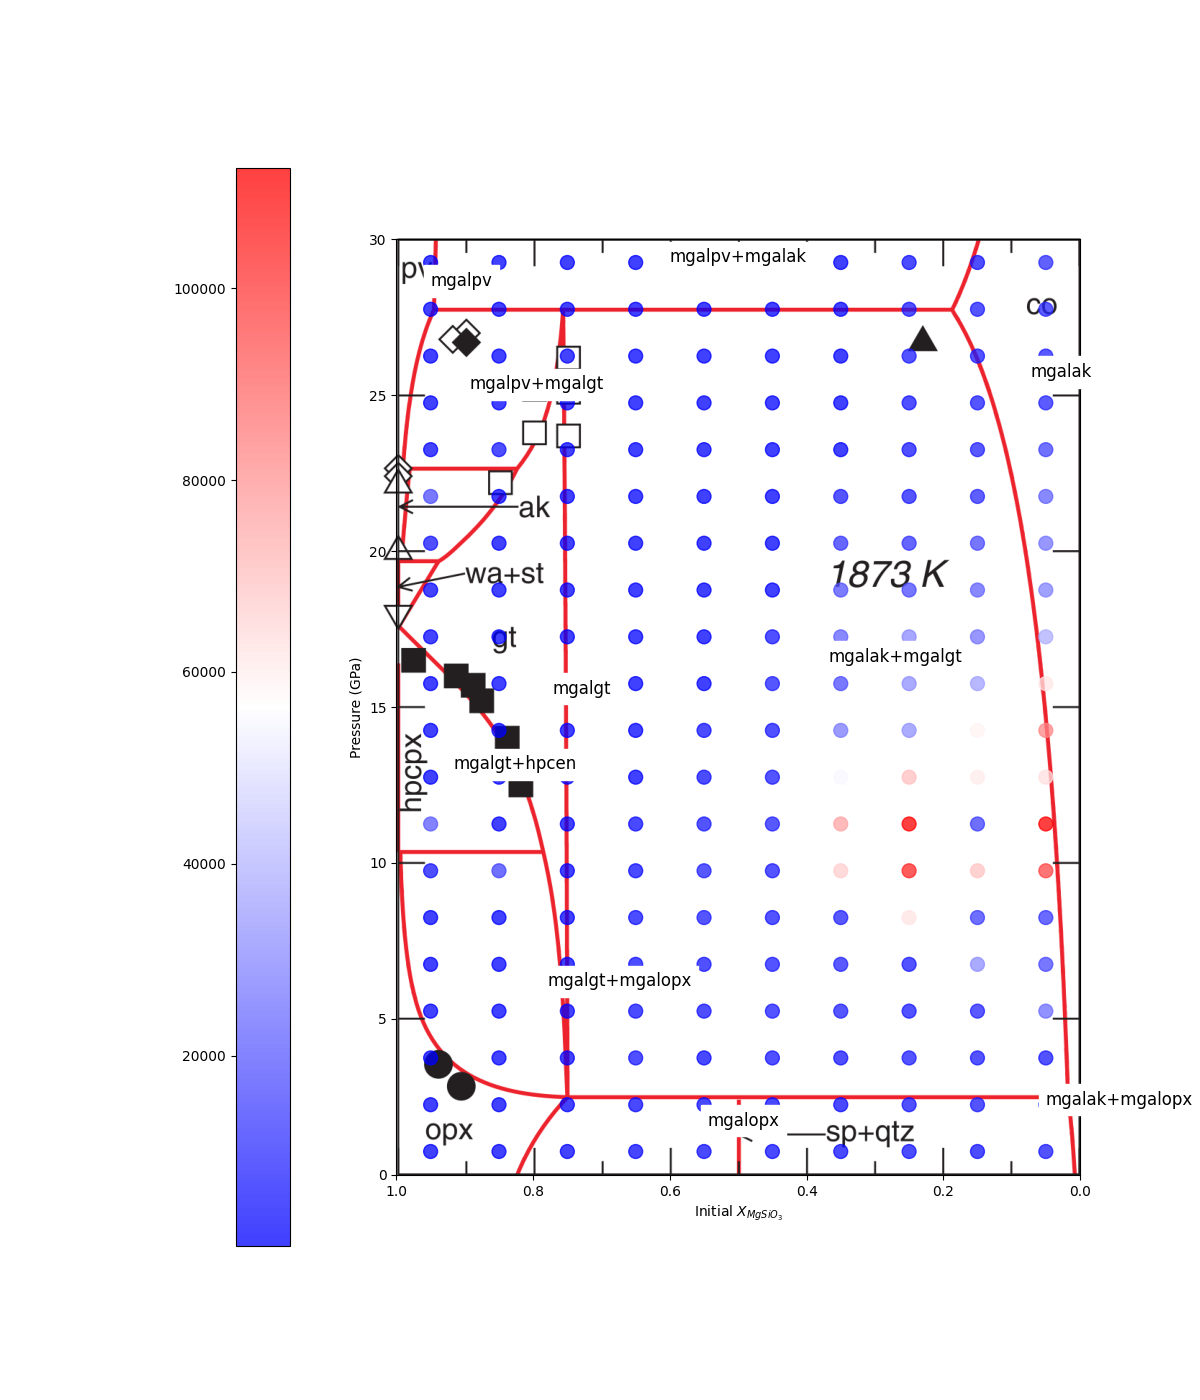

In [17]:
bdfdiag.plot_ndt()

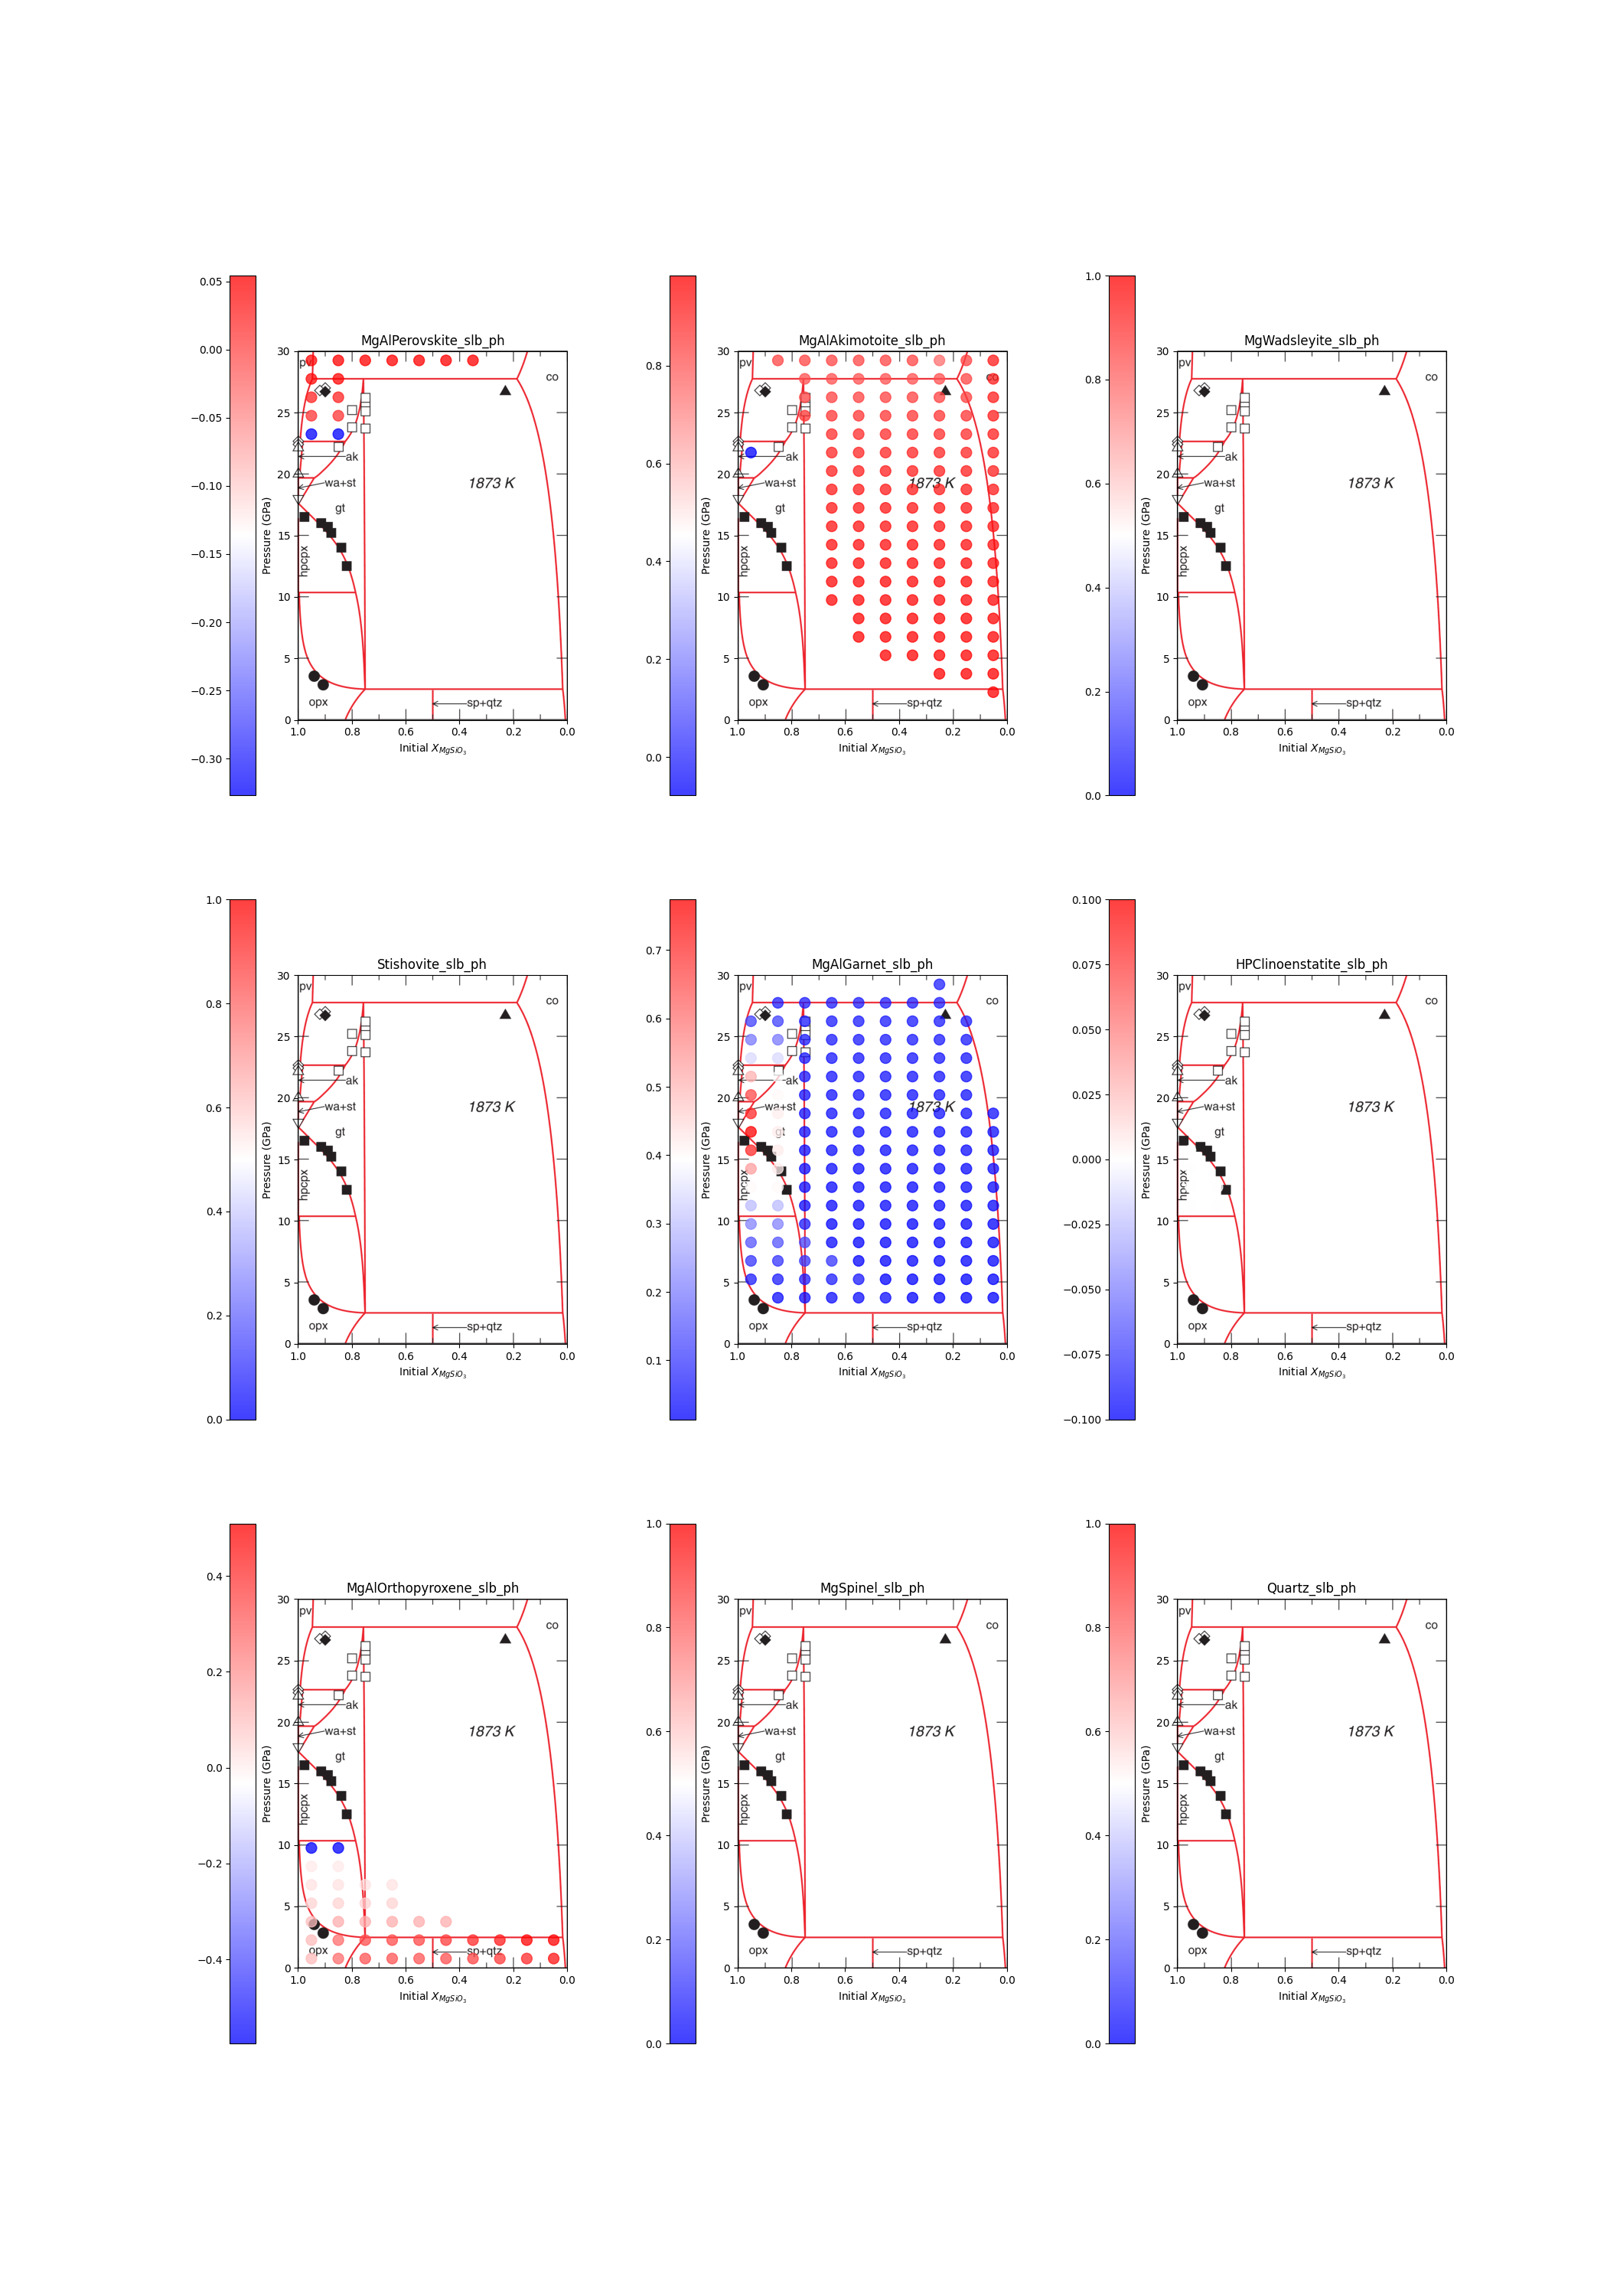

In [18]:
bdfdiag.plot_Xi1()